# self-made Perceptron gradient descent

In [103]:
import numpy as np
import struct
from array import array
from os.path import join
import matplotlib.pyplot as plt

In [2]:
import numpy as np # linear algebra

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = MnistDataloader(
    "data/mnist/train-images.idx3-ubyte",
    "data/mnist/train-labels.idx1-ubyte",
    "data/mnist/t10k-images.idx3-ubyte",
    "data/mnist/t10k-labels.idx1-ubyte"
    ).load_data()

In [207]:
class Perceptron:
    def __init__(self, num_inputs):
        # self.weights = np.random.rand(num_inputs)
        # self.bias = np.random.rand(0)
        self.weights = np.zeros(num_inputs)
        self.bias = 0
        self.activation = lambda x: 1 / (1 + np.exp(x * -1))
        self.activation_derivative = lambda x: self.activation(x) * (1 - self.activation(x))

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return total
    
    def predict(self, inputs):
        pred = self.activation(np.dot(self.weights, inputs) + self.bias)
        return pred
        
    def train(self, training_inputs, reals, learning_rate, epochs):
        for _ in range(epochs):
            for inputs, real in zip(training_inputs, reals):
                a = self.feedforward(inputs)
                phi = self.activation(a)
                phi_der = self.activation_derivative(a)
                sigma = phi
                delta = sigma - real
                gradient = delta * phi_der
                # gradient = self.error(self.predict(inputs), real) * self.activation_derivative(self.feedforward(inputs))
                self.weights -= learning_rate * gradient * inputs
                self.bias -= learning_rate * gradient * self.bias
                # 0 is 1, 1 is 2


In [9]:
x_train = np.array(x_train_raw).reshape(60000, 28*28)
y_train = np.array(y_train_raw)
x_test = np.array(x_test_raw).reshape(10000, 28*28)
y_test = np.array(y_test_raw)

In [208]:
ps = [Perceptron(28 * 28) for _ in range(10)]

In [214]:
for i, p in enumerate(ps):
    p.train(x_train, (y_train == i) * 1 - (y_train != i) * 1, 0.01, 1)

/tmp/ipykernel_26553/4167975051.py:7: RuntimeWarning: overflow encountered in exp
  self.activation = lambda x: 1 / (1 + np.exp(x * -1))


1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [215]:
ps[0].weights

array([ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,

In [216]:
pred_correct = 0
N = x_test.shape[0]
errors = {i: 0 for i in range(10)}
for i_t, x in enumerate(x_test[:N, :]):
    predicts = [p.predict(x) for p in ps]
    max_ind = 0
    max_val = float('-inf')
    for i, pred in enumerate(predicts):
        if pred > max_val:
            max_val = pred
            max_ind = i
    print(y_test[i_t], predicts, max_ind == y_test[i_t])
    is_correct = max_ind == y_test[i_t]
    errors[y_test[i_t]] += max_ind != y_test[i_t]
    pred_correct += is_correct
pred_correct / N

/tmp/ipykernel_26553/4167975051.py:7: RuntimeWarning: overflow encountered in exp
  self.activation = lambda x: 1 / (1 + np.exp(x * -1))


7 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
2 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
1 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
0 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
4 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
1 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
4 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
9 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
5 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] True
9 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
0 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
6 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
9 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
0 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
1 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False
5 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] True
9 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] False

0.0892

<BarContainer object of 10 artists>

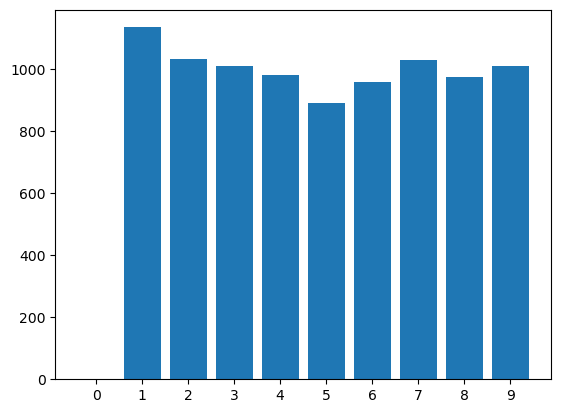

In [181]:
plt.xticks(range(10))
plt.bar(errors.keys(), errors.values())